# Programmazione di Applicazioni Data Intensive: Progetto 

- Candidato: Fabrizio Margotta
- Dataset: [Malicious and Benign Websites](https://www.kaggle.com/xwolf12/malicious-and-benign-websites) by Christian Urcuqui

## Introduzione

## Analisi esplorativa

In [171]:
# setup e test librerie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import io
import seaborn as sns
sns.set();
import sklearn

In [2]:
dtypes = {
    'CHARSET': 'category',
    'SERVER': 'category',
    'WHOIS_COUNTRY': 'category',
    'WHOIS_STATEPRO': 'category',
}

In [3]:
DS_URL = "https://gitlab.com/emrevoid/uni/dia/project/famar/-/raw/master/dataset.csv"
#https://stackoverflow.com/questions/51092889/receiving-http-error-403-forbidden-csv-download/51093473
response = requests.get(DS_URL)
file_object = io.StringIO(response.content.decode('utf-8'))

ds = pd.read_csv(file_object, header=0, index_col=0, sep=';', dtype=dtypes)
ds['WHOIS_REGDATE'] = pd.to_datetime(ds['WHOIS_REGDATE'], errors='coerce')
ds['WHOIS_UPDATED_DATE'] = pd.to_datetime(ds['WHOIS_UPDATED_DATE'], errors='coerce')
ds = ds.rename(columns={"Type": "malicious"})
ds.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,malicious
URL,,,,,,,,,,,,,,,,,,,,
M0_109,16,7,iso-8859-1,nginx,263.0,None,None,2015-10-10 18:21:00,NaT,7,0,2,700,9,10,1153,832,9,2.0,1
B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,NaT,NaT,17,7,4,1230,17,19,1265,1230,17,0.0,0
B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,NaT,NaT,0,0,0,0,0,0,0,0,0,0.0,0
B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,1997-07-10 04:00:00,2013-12-09 00:45:00,31,22,3,3812,39,37,18784,4380,39,8.0,0
B0_403,17,6,UTF-8,None,124140.0,US,TX,1996-12-05 00:00:00,2017-11-04 00:00:00,57,2,5,4278,61,62,129889,4586,61,4.0,0


In [4]:
ds.shape

(1781, 20)

In [5]:
ds["malicious"].value_counts()

0    1565
1     216
Name: malicious, dtype: int64

In [6]:
ds["malicious"].value_counts(normalize=True)

0    0.87872
1    0.12128
Name: malicious, dtype: float64

In [7]:
ds.describe()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,malicious
count,1781.000000,1781.000000,969.000000,1781.000000,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
mean,56.961258,11.111735,11726.927761,16.261089,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,27.555586,4.549896,36391.809051,40.500975,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,39.000000,8.000000,324.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,49.000000,10.000000,1853.000000,7.000000,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,68.000000,13.000000,11323.000000,22.000000,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000
max,249.000000,43.000000,649263.000000,1194.000000,708.000000,17.000000,2.362906e+06,1198.000000,1284.000000,2.060012e+06,2.362906e+06,1198.000000,20.000000,1.000000


In [8]:
ds.nunique()

URL_LENGTH                   142
NUMBER_SPECIAL_CHARACTERS     31
CHARSET                        9
SERVER                       239
CONTENT_LENGTH               637
WHOIS_COUNTRY                 49
WHOIS_STATEPRO               182
WHOIS_REGDATE                888
WHOIS_UPDATED_DATE           593
TCP_CONVERSATION_EXCHANGE    103
DIST_REMOTE_TCP_PORT          66
REMOTE_IPS                    18
APP_BYTES                    825
SOURCE_APP_PACKETS           113
REMOTE_APP_PACKETS           116
SOURCE_APP_BYTES             885
REMOTE_APP_BYTES             822
APP_PACKETS                  113
DNS_QUERY_TIMES               10
malicious                      2
dtype: int64

In [29]:
ds['SERVER'].value_counts()

Apache                    386
nginx                     211
None                      175
Microsoft-HTTPAPI/2.0     113
cloudflare-nginx           94
                         ... 
Tengine                     1
Sun-ONE-Web-Server/6.1      1
Scratch Web Server          1
SSWS                        1
.V01 Apache                 1
Name: SERVER, Length: 239, dtype: int64

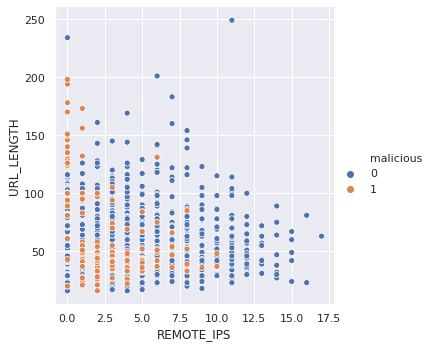

In [61]:
ordered = ds.sort_values('malicious')
sns.relplot(x="REMOTE_IPS", y="URL_LENGTH", hue="malicious", data=ordered);

In [82]:
features = ['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'APP_BYTES']

Rimozione di valori fuori "scala" che non permettono di visualizzare correttamente alcuni scatterplot (poiché "appiattiscono" la distribuzione).

In [139]:
ds.sort_values('APP_BYTES')['APP_BYTES']
ds = ds.drop(ds.index[ds.APP_BYTES > 40000])
ds.sort_values('APP_BYTES')['APP_BYTES']

URL
B0_896         0
B0_863         0
B0_976         0
B0_980         0
B0_1291        0
           ...  
B0_304     18084
M0_121     20074
B0_737     20749
B0_222     23383
B0_481     26631
Name: APP_BYTES, Length: 1779, dtype: int64

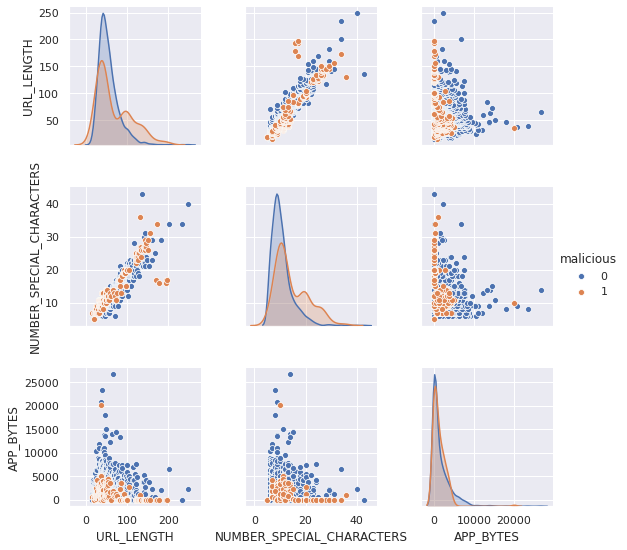

In [141]:
sns.pairplot(data=ds, hue="malicious", vars=features);

## Preparazione del dataset

### Gestione di valori nulli

Verifichiamo che nel dataset siano presenti valori nulli:

In [142]:
ds.isna().sum()

URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               811
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                130
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
malicious                      0
dtype: int64

Usiamo il metodo `.fillna()`:
- per le feature numeriche sostituiamo i valori nulli con le medie

In [163]:
ds['CONTENT_LENGTH'].fillna(ds['CONTENT_LENGTH'].mean(), inplace=True)
ds['DNS_QUERY_TIMES'].fillna(ds['DNS_QUERY_TIMES'].mean(), inplace=True)

- per le feature temporali (`WHOIS_REGDATE` e `WHOIS_UPDATED_DATE`) usiamo i parametri `ffill` o `bfill`

In [161]:
ds['WHOIS_REGDATE'].fillna(method="ffill", inplace=True)
ds['WHOIS_UPDATED_DATE'].fillna(method="ffill", inplace=True)
ds['WHOIS_UPDATED_DATE'].fillna(method="bfill", inplace=True)

Verifichiamo di aver risolto il problema dei valori nulli:

In [164]:
ds.isna().sum()

URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       1
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
malicious                    0
dtype: int64

In [168]:
# X = ds[['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS','DNS_QUERY_TIMES']]
X = ds.drop(['CHARSET', 'SERVER', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], axis=1)
y = ds['malicious']

### Risoluzione problema classi sbilanciate

In [192]:
from imblearn.over_sampling import SMOTE
from collections import Counter
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

[(0, 1563), (1, 1563)]


ValueError: could not broadcast input array from shape (3126,2) into shape (3126)

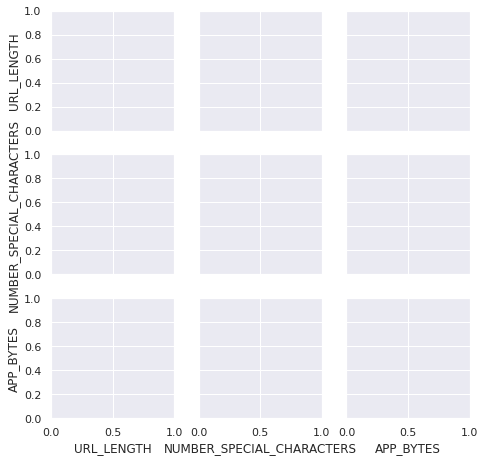

In [201]:
sns.set();
ds_oversampled = pd.concat([X_resampled, y_resampled], axis=1)
sns.pairplot(data=ds_oversampled, hue="malicious", vars=features);

## Classificazione

Separazione del dataset:

In [193]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_resampled, y_resampled,
    test_size=1/3,
    random_state=42,
)

### Perceptron

In [ ]:
clf_smote = LinearSVC().fit(X_resampled, y_resampled)

In [194]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Perceptron with standard scaler
std_perceptron = Pipeline([
    ('std', StandardScaler()),
    ('perceptron', Perceptron(random_state=42, class_weight={1: 10}))
])

std_perceptron.fit(X_train, y_train)
print('Accuracy on train {:.2f}%'.format(std_perceptron.score(X_train, y_train)*100))
print('Accuracy on val {:.2f}%'.format(std_perceptron.score(X_val, y_val)*100))

Accuracy on train 100.00%
Accuracy on val 99.90%


### Matrice di confusione

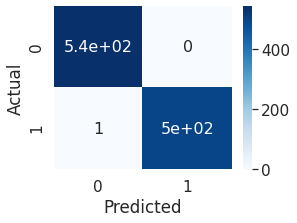

In [195]:
# https://www.kaggle.com/agungor2/various-confusion-matrix-plots#1.-Seaborn-Heatmap-
from sklearn.metrics import confusion_matrix
y_pred = std_perceptron.predict(X_val)
data = confusion_matrix(y_val, y_pred)

df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_train))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (4,3))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

### Precision e recall

In [188]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_val, y_pred, pos_label=1)

1.0

In [189]:
recall_score(y_val, y_pred, pos_label=1)

1.0

In [190]:
f1_score(y_val, y_pred, average=None)

array([1., 1.])

In [191]:
f1_score(y_val, y_pred, average="macro")

1.0